<a href="https://colab.research.google.com/github/Rajeev9-Pondala/Data-Mining-Machine-Learning/blob/main/%20Empirical%20CDF%20Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the dataset
data = pd.read_csv('telescope_data.csv')

# Extract the attributes (excluding the last column which is the class label)
attributes = data.iloc[:, :-1]

# Compute the multivariate mean vector
mean_vector = np.mean(attributes, axis=0)
print("Multivariate mean vector:")
print(mean_vector)


Multivariate mean vector:
fLength      57.675030
fWidth       24.015214
fSize         2.873639
fConc         0.363390
fConc1        0.207434
fAsym        -3.221765
fM3Long      13.136590
fM3Trans      1.791702
fAlpha       31.526518
fDist       197.804527
dtype: float64


In [ ]:
# Center the data
centered_data = attributes - mean_vector

# Compute the sample covariance matrix using inner products
covariance_matrix_inner = np.dot(centered_data.T, centered_data) / (len(centered_data) - 1)
print("\nSample covariance matrix using inner products:")
print(covariance_matrix_inner)

# Compute the sample covariance matrix using outer products
covariance_matrix_outer = np.cov(centered_data, rowvar=False)
print("\nSample covariance matrix using outer products:")
print(covariance_matrix_outer)



Sample covariance matrix using inner products:
[[ 1.76671060e+03  7.31278208e+02  1.38777613e+01 -4.79597589e+00
  -2.75430985e+00 -3.38521963e+02 -3.17091670e+02  1.34197204e+02
  -4.26995152e+01  1.08850674e+03]
 [ 7.31278208e+02  5.11310810e+02  7.03148837e+00 -2.23083506e+00
  -1.29248588e+00  2.54802711e+02 -4.19194118e+02  7.64208425e+01
   3.46720258e+01  4.56444068e+02]
 [ 1.38777613e+01  7.03148837e+00  2.26271192e-01 -6.74936308e-02
  -3.87883133e-02  4.60739147e-01  1.60894156e+00  6.48693246e-01
  -2.84638820e+00  1.74006840e+01]
 [-4.79597589e+00 -2.23083506e+00 -6.74936308e-02  2.94825044e-02
   1.78747973e-02  3.29189889e-01 -8.84361090e-01 -3.93915412e-01
   1.31979942e+00 -4.61574466e+00]
 [-2.75430985e+00 -1.29248588e+00 -3.87883133e-02  1.78747973e-02
   1.14612948e-02  1.54446386e-01 -6.05826971e-01 -2.09961420e-01
   7.10752532e-01 -2.52378666e+00]
 [-3.38521963e+02  2.54802711e+02  4.60739147e-01  3.29189889e-01
   1.54446386e-01  3.89983867e+03 -2.63597250e+02  

In [ ]:
# Select attributes 7 and 8
selected_attributes = attributes.iloc[:, [6, 7]]

# Center the selected data
centered_selected_data = selected_attributes - np.mean(selected_attributes, axis=0)

# Compute the covariance matrix
covariance_matrix_selected = np.cov(centered_selected_data, rowvar=False)

# Compute eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix_selected)
print("\nEigenvalues:")
print(eigen_values)
print("\nEigenvectors:")
print(eigen_vectors)



Eigenvalues:
[2857.93049538  457.49913084]

Eigenvectors:
[[ 0.99865762 -0.05179726]
 [ 0.05179726  0.99865762]]


In [ ]:
# Select attributes 3, 7, and 8
selected_attributes = attributes.iloc[:, [2, 6, 7]]

# Compute the covariance matrix
covariance_matrix_selected = np.cov(selected_attributes, rowvar=False)
print("\nCovariance matrix between attributes 3, 7, and 8:")
print(covariance_matrix_selected)



Covariance matrix between attributes 3, 7, and 8:
[[2.26271192e-01 1.60894156e+00 6.48693246e-01]
 [1.60894156e+00 2.85149024e+03 1.24168867e+02]
 [6.48693246e-01 1.24168867e+02 4.63939383e+02]]


In [ ]:
# Convert attribute 2 to categorical with 4 categories

attribute_2_categorical = pd.qcut(attributes.iloc[:, 1], q=4)

# Convert categorical attribute back to numeric representation
attribute_2_numeric = attribute_2_categorical.cat.codes

# Compute the covariance matrix of the new attribute
covariance_matrix_categorical = np.cov(attribute_2_numeric, rowvar=False)
print("\nCovariance matrix of the new categorical attribute:")
print(covariance_matrix_categorical)



Covariance matrix of the new categorical attribute:
1.2611940298507467


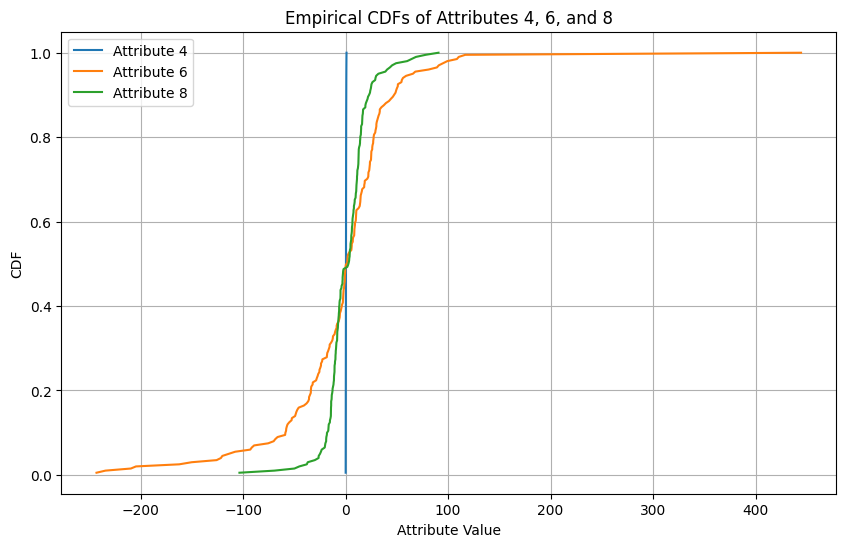

In [ ]:
# Define Empirical CDF function
def empirical_cdf(data):
    sorted_data = np.sort(data)
    n = len(data)
    y = np.arange(1, n + 1) / n
    return sorted_data, y

# Plot Empirical CDFs
plt.figure(figsize=(10, 6))

for i, attribute_index in enumerate([3, 5, 7]):
    sorted_data, cdf = empirical_cdf(attributes.iloc[:, attribute_index])
    plt.plot(sorted_data, cdf, label=f'Attribute {attribute_index+1}')

plt.title('Empirical CDFs of Attributes 4, 6, and 8')
plt.xlabel('Attribute Value')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Compute the covariance matrix of attribute 10
covariance_matrix_attribute_10 = np.cov(attributes.iloc[:, 9], rowvar=False)
print("\nCovariance matrix of attribute 10:")
print(covariance_matrix_attribute_10)



Covariance matrix of attribute 10:
6361.467590825795



Correlation between Attributes 1 and 2 (cosine of the angle): 0.7694093096665072


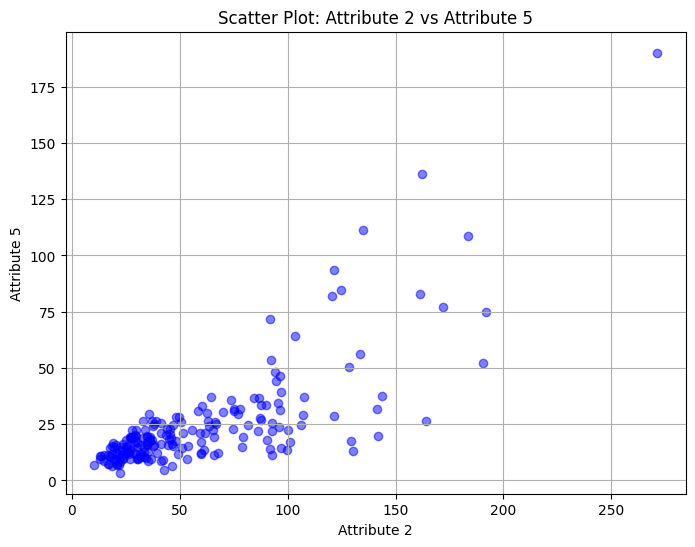

In [ ]:
# Compute the centered attribute vectors
centered_attribute_1 = attributes.iloc[:, 0] - np.mean(attributes.iloc[:, 0])
centered_attribute_2 = attributes.iloc[:, 1] - np.mean(attributes.iloc[:, 1])

# Compute the cosine of the angle
cosine_angle = np.dot(centered_attribute_1, centered_attribute_2) / (np.linalg.norm(centered_attribute_1) * np.linalg.norm(centered_attribute_2))

print("\nCorrelation between Attributes 1 and 2 (cosine of the angle):", cosine_angle)

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(attributes.iloc[:, 0], attributes.iloc[:, 1], marker='o', c='b', alpha=0.5)
plt.title('Scatter Plot: Attribute 2 vs Attribute 5')
plt.xlabel('Attribute 2')
plt.ylabel('Attribute 5')
plt.grid(True)
plt.show()


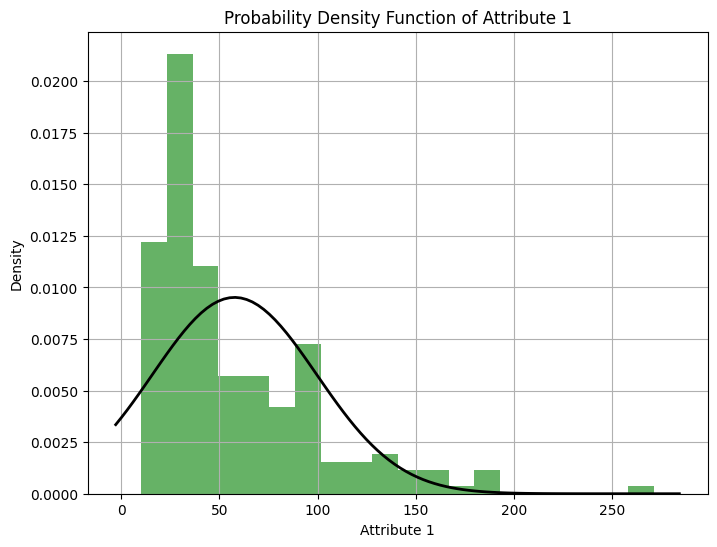

In [ ]:
# Plot probability density function of Attribute 1
plt.figure(figsize=(8, 6))
plt.hist(attributes.iloc[:, 0], bins=20, density=True, alpha=0.6, color='g')

# Fit a normal distribution to the data
mu, std = norm.fit(attributes.iloc[:, 0])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Probability Density Function of Attribute 1')
plt.xlabel('Attribute 1')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
# Compute variances of each attribute
variances = np.var(attributes, axis=0)

# Find index of attribute with largest and smallest variance
max_variance_index = np.argmax(variances)
min_variance_index = np.argmin(variances)

print("\nAttribute with largest variance:", max_variance_index + 1, "Variance:", variances[max_variance_index])
print("Attribute with smallest variance:", min_variance_index + 1, "Variance:", variances[min_variance_index])



Attribute with largest variance: 10 Variance: 6329.818498334127
Attribute with smallest variance: 5 Variance: 0.01140427339867825


In [ ]:
# Compute pairwise covariances
pairwise_covariances = np.cov(attributes, rowvar=False)

# Set diagonal elements to zero as they represent variances
np.fill_diagonal(pairwise_covariances, 0)

# Find index of pair with largest covariance
max_covariance_index = np.unravel_index(np.argmax(pairwise_covariances, axis=None), pairwise_covariances.shape)

# Find index of pair with smallest covariance
min_covariance_index = np.unravel_index(np.argmin(pairwise_covariances, axis=None), pairwise_covariances.shape)

# Print pair of attributes with largest covariance and its value
print("\nPair of attributes with largest covariance:", max_covariance_index, "Covariance:", pairwise_covariances[max_covariance_index])

# Print pair of attributes with smallest covariance and its value
print("Pair of attributes with smallest covariance:", min_covariance_index, "Covariance:", pairwise_covariances[min_covariance_index])



Pair of attributes with largest covariance: (0, 9) Covariance: 1088.506735404915
Pair of attributes with smallest covariance: (5, 9) Covariance: -659.9735489916217


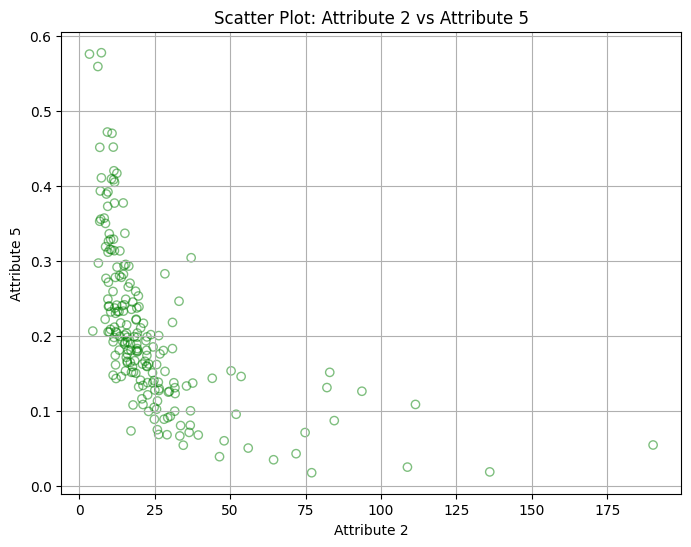

In [ ]:
# Plot scatter plot of Attribute 2 vs Attribute 5 with circles as markers
plt.figure(figsize=(8, 6))
plt.scatter(attributes.iloc[:, 1], attributes.iloc[:, 4], marker='o', facecolors='none', edgecolors='g', alpha=0.5)
plt.title('Scatter Plot: Attribute 2 vs Attribute 5')
plt.xlabel('Attribute 2')
plt.ylabel('Attribute 5')
plt.grid(True)
plt.show()
